In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bgt_reader import get_properties, WMTS_calculator, bgt_classifier
from helpers import wgs_to_rd
from matplotlib import cm
import shapefile as shp  

In [2]:
def check_bgt(points):
    functions = ['berm']
    appearances = ['groenvoorziening', 'loofbos', 'onverhard', 'zand']
    count = 0
    
    # loop through points
    for p in points:
        
        # get point location
        x, y = p[0], p[1]

        # read out bgt
        col, row, i, j = WMTS_calculator(x, y)
        try:
            properties = get_properties(col, row, i, j)
#             print(properties)
        except:
            return None
            
        # check function of bgt
        if 'functie' in properties:
            function = properties['functie']
            
            # check if function overlaps
            if function in functions:
                if function != 'berm':
                    continue
                
        # check for appearance
        if 'fysiek_voorkomen' in properties:
            appearance_bgt = properties['fysiek_voorkomen']
            
            if appearance_bgt in appearances: 
                continue
        
        count += 1
#         # building is also obstacle
#         if 'bag_pnd' in properties:
#             count += 1
#             continue
        

    return count



In [3]:
def intersection(jsonObject, df):
    
    roots = jsonObject['CityObjects']
    vertices = jsonObject['vertices']
    ids = roots.keys()
    v = 15

    x_list = []
    y_list = []
    count_list = []
    color_list = []
    number_list = []
    viridis = cm.get_cmap('viridis', v)

    for n, i in enumerate(ids):
        lb = n*2*v
        ub = n*2*v+v
        points = vertices[lb:ub]
        tree_number = i[3:9]
        if tree_number == 'objNR_':
            continue
            
        # match tree with gemeente data to find location of center
        try:
            tree_index = df.index[df['Boomnummer'] == float(tree_number)][0]
        except:
            continue
            
        # count intersections with bgt functions
        count = check_bgt(points)
        if not count:
            continue
        count_list.append(count/v)
        color = viridis(count/v)
        color_list.append(color)
        print(tree_number, count)


        lng = df.at[tree_index, 'LNG']
        lat = df.at[tree_index, 'LAT']
        rd_x, rd_y = wgs_to_rd(lat, lng)
        x_list.append(rd_x)
        y_list.append(rd_y)
        number_list.append(tree_number)
    
    return x_list, y_list, count_list, color_list, number_list


In [4]:
treedata = 'data/sarphati_trees.csv'
df = pd.read_csv(treedata)
area = 'Sarphati'

In [5]:
path_treedict = 'output/Sarphati/treedict/marginal/2020/json_mar.city.json'

with open(path_treedict) as jsonFile:
    jsonObject_treedict = json.load(jsonFile)
    jsonFile.close()
    

In [6]:
x_list_treedict, y_list_treedict, count_list_treedict, color_list_treedict, number_list_treedict = intersection(jsonObject_treedict, df)

592131 7
581606 4
564763 3
564762 6
564467 7
533126 5
532854 4
532852 4
530796 15
530795 11
530966 1
530965 4
529172 7
529157 15
529145 3
529395 7
529136 9
529131 7
529219 15
530148 7
529884 15
530349 5
530348 5
530089 15
530220 15
529919 15
528302 9
525351 15
525350 7
524834 15
525331 7
524833 15
524826 5
525296 9
525038 15
524795 10
524770 6
524747 15
524746 15
524745 15
524744 15
524734 15
524970 15
524693 2
524934 15
524687 7
524919 11
524876 3
525103 15
524862 7
524861 7
525579 3
525578 6
525577 4
526097 5
526096 5
525818 3
525816 5
525774 2
526037 5
526233 5
525933 5
525642 15
525641 15
526120 6
526119 7
525852 15
525851 15
522292 2
522390 2
522361 7
523579 7
521093 6
521091 6
521090 8
520548 8
521430 5
521427 9
521146 5
521403 2
521143 5
522195 15
521919 6
521916 8
521914 7
521901 2
521896 4
521891 3
521890 5
521889 5
522148 2
521837 3
521831 8
521829 8
521826 3
521235 4
521490 3
521481 4
518971 7
518967 7
518966 2
518964 4
518959 8
518958 5
518921 12
518920 15
518919 14
518918 

In [7]:

df_treedict = pd.DataFrame(list(zip(x_list_treedict, y_list_treedict, count_list_treedict, color_list_treedict, number_list_treedict)),
               columns =['rdx', 'rdy', 'count', 'color', 'number'])
display(df_treedict.head())

df_treedict.to_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\{}_2020_treedict.csv".format(area))

,rdx,rdy,count,color,number
0,121490.633201,485186.725623,0.466667,"(0.127568, 0.566949, 0.550556, 1.0)",592131
1,121607.118145,485294.533878,0.266667,"(0.212395, 0.359683, 0.55171, 1.0)",581606
2,121468.329284,485253.303894,0.200000,"(0.248629, 0.278775, 0.534556, 1.0)",564763
3,121426.025787,485244.133576,0.400000,"(0.153364, 0.497, 0.557724, 1.0)",564762
4,121558.880788,485304.429348,0.466667,"(0.127568, 0.566949, 0.550556, 1.0)",564467


In [8]:
path_static = 'output/Sarphati/static/marginal/2020/json_mar.city.json'

with open(path_static) as jsonFile:
    jsonObject_static = json.load(jsonFile)
    jsonFile.close()
    
x_list_static, y_list_static, count_list_static, color_list_static, number_list_static = intersection(jsonObject_static, df)

592131 7
564762 6
564467 7
533126 3
532854 3
532852 2
530795 11
530965 3
529409 15
529157 15
529395 7
529131 7
530349 5
530220 15
529946 15
529926 2
529919 15
526869 15
527856 15
527855 15
527796 15
525351 15
525350 5
524834 15
525331 7
525075 15
524833 15
524826 5
525296 9
525038 15
524795 8
524506 4
524770 5
524747 15
524746 15
524745 15
524725 7
524970 15
524693 1
524934 15
524687 7
524682 6
524919 6
524876 1
525103 15
524862 7
525579 3
525578 5
526096 5
525818 1
525816 5
526299 15
526037 5
526280 5
525937 15
525936 15
526179 15
526178 15
526177 15
525643 15
525641 15
526140 15
526139 15
526128 15
526127 15
526126 15
526125 15
526124 15
526123 15
526121 15
525851 15
522373 5
522895 2
524259 6
521093 6
521091 7
521090 8
521069 8
521427 4
521425 4
521146 4
521406 5
521143 4
522195 15
521919 6
521916 8
521914 5
521896 1
521891 2
521890 5
521889 5
521868 7
521837 3
521829 8
521490 1
521481 4
518971 6
518967 7
518966 2
518964 4
518963 1
518962 6
518959 8
518958 5
518921 14
518918 6
51891

In [9]:


df_static = pd.DataFrame(list(zip(x_list_static, y_list_static, count_list_static, color_list_static, number_list_static)),
               columns =['rdx', 'rdy', 'count', 'color', 'number'])
display(df_static.head())

df_static.to_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\{}_2020_static.csv".format(area))


,rdx,rdy,count,color,number
0,121490.633201,485186.725623,0.466667,"(0.127568, 0.566949, 0.550556, 1.0)",592131
1,121426.025787,485244.133576,0.400000,"(0.153364, 0.497, 0.557724, 1.0)",564762
2,121558.880788,485304.429348,0.466667,"(0.127568, 0.566949, 0.550556, 1.0)",564467
3,121499.922852,485190.223162,0.200000,"(0.248629, 0.278775, 0.534556, 1.0)",533126
4,121427.124390,485195.279545,0.200000,"(0.248629, 0.278775, 0.534556, 1.0)",532854


In [10]:
path_treegrowth = 'output/Sarphati/treegrowth/marginal/2020/json_mar.city.json'

with open(path_treegrowth) as jsonFile:
    jsonObject_treegrowth = json.load(jsonFile)
    jsonFile.close()
    
x_list_treegrowth, y_list_treegrowth, count_list_treegrowth, color_list_treegrowth, number_list_treegrowth = intersection(jsonObject_treegrowth, df)

564762 6
564467 7
530796 15
530795 11
529409 15
529157 15
529145 3
529136 9
529039 15
529219 15
529884 15
530089 15
530220 15
529926 2
529919 15
528302 9
525351 15
524834 15
525331 7
524833 15
525038 15
524506 3
524747 15
524746 15
524745 15
524744 15
524734 15
524725 7
524970 15
524693 2
524919 11
525103 15
524862 5
524861 7
525774 2
526280 5
526233 5
525933 5
526179 15
526178 15
526177 15
525643 15
525642 15
525641 15
526140 15
526139 15
526120 6
526119 7
525852 15
525851 15
522390 2
522373 7
522361 5
524260 6
520548 8
521078 4
521430 5
521427 9
521146 5
521143 4
522195 15
521896 3
521890 7
522148 3
521868 7
521837 3
521235 4
521481 4
518964 5
518959 5
518958 5
518922 1
518921 12
518920 15
518919 15
518918 8
518917 7
518916 6
518911 9
518904 7
518901 3
518879 4
518858 4
518857 3
518855 2
518854 2
518853 5
519315 3
519579 3
519558 2
519557 4
519556 8
519555 3
519539 5
519537 3
519536 7
519253 2
519523 5
519754 8
519753 9
519159 3
517178 15
509398 15
509103 15
509102 15
509101 15
50899

In [11]:


df_treegrowth = pd.DataFrame(list(zip(x_list_treegrowth, y_list_treegrowth, count_list_treegrowth, color_list_treegrowth, number_list_treegrowth)),
               columns =['rdx', 'rdy', 'count', 'color', 'number'])
display(df_treegrowth.head())


df_treegrowth.to_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\{}_2020_treegrowth.csv".format(area))

,rdx,rdy,count,color,number
0,121426.025787,485244.133576,0.400000,"(0.153364, 0.497, 0.557724, 1.0)",564762
1,121558.880788,485304.429348,0.466667,"(0.127568, 0.566949, 0.550556, 1.0)",564467
2,121781.627901,485207.569420,1.000000,"(0.993248, 0.906157, 0.143936, 1.0)",530796
3,121792.803904,485218.064685,0.733333,"(0.449368, 0.813768, 0.335384, 1.0)",530795
4,121589.391523,485212.093101,1.000000,"(0.993248, 0.906157, 0.143936, 1.0)",529409


## Meldingen SIA

In [12]:
sia_path =  r'C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Meldingen\Meldingen_IJburg.xlsx'
sia_df = pd.read_excel(sia_path)
display(sia_df)

,SIA nr,Subrubriek,Melding,Datum,'(i)',Oplossing,Number of Records,Number of Records.1,LATITUDE,LONGITUDE,ADRES,POSTCODE
0,8390,"Onderhoud stoep, rijweg en parkeerplaats",De boomwortels van de boom voor ons huis verta...,2018-08-21,(i),"Beste melder,_x000D_\n_x000D_\nde boomwortels ...",1,1,52.350378,5.001341,Jan Vrijmanstraat 40,1087MC
1,20475,"Onderhoud stoep, rijweg en parkeerplaats","Stenen komen omhoog in trottoir, waarschijnlij...",2018-09-09,(i),"Geachte melder,_x000D_\n_x000D_\nde boomwortel...",1,1,52.3502,5.001177,Maurits Bingerplantsoen 11,1087ME
2,21785,"Onderhoud stoep, rijweg en parkeerplaats",rond het hele plantsoen komen de tegels omhoog...,2018-09-11,(i),"Geachte melder,_x000D_\n_x000D_\nde boomwortel...",1,1,52.350507,5.002111,Maurits Bingerplantsoen 1,1087ME
3,37957,"Onderhoud stoep, rijweg en parkeerplaats",Vlak voor de woning aan de Ben van Meerendonks...,2018-10-05,(i),"Geachte melder,_x000D_\n_x000D_\nde boomwortel...",1,1,52.349676,5.011070,Ben van Meerendonkstraat 217,1087LN
4,156019,"Onderhoud stoep, rijweg en parkeerplaats",OOS-01214_x000D_\nGranietkeien/Klinkers VP Boo...,2019-04-15,(i),hersteld.,1,1,52.364221,4.984847,Brigantijnkade 10,1086VB
5,168617,"Onderhoud stoep, rijweg en parkeerplaats",OOS-01353_x000D_\nBoomwortels behandeld en voe...,2019-04-30,(i),Hersteld.,1,1,52.361892,4.977510,Jan Olphert Vaillantlaan 69A,1086XZ
6,168618,"Onderhoud stoep, rijweg en parkeerplaats",OOS-01352_x000D_\nBoomwortels behandeld en voe...,2019-04-30,(i),hersteld.,1,1,52.361412,4.976340,Jan Olphert Vaillantlaan 101,1086XZ
7,168621,"Onderhoud stoep, rijweg en parkeerplaats",OOS-01351_x000D_\nboomwortels behandeld en voe...,2019-04-30,(i),hersteld.,1,1,52.361811,4.977291,Jan Olphert Vaillantlaan 75,1086XZ
8,168622,"Onderhoud stoep, rijweg en parkeerplaats",OOS-01350_x000D_\nboomwortels behandeld en voe...,2019-04-30,(i),hersteld.,1,1,52.361831,4.978069,Jan Olphert Vaillantlaan 42A,1086ZA
9,168626,"Onderhoud stoep, rijweg en parkeerplaats",OOS-01347_x000D_\nBoomwortels behandeld en voe...,2019-04-30,(i),Hersteld.,1,1,52.36268,4.979162,Francisco Faleirostraat 37,1086XV


52.3501360393598 5.0008606910706


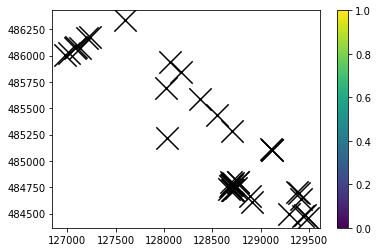

In [13]:
sia_x = []
sia_y = []
for index, row in sia_df.iterrows():
    lat = row['LATITUDE']
    lng = row['LONGITUDE']
    if type(lat)==str:
        print(float(lat.replace(',', '.')),lng)
        lat = float(lat.replace(',', '.'))
    rd_x, rd_y = wgs_to_rd(lat, lng)
    sia_x.append(rd_x)
    sia_y.append(rd_y)
plt.scatter(sia_x, sia_y, c='Black', marker='x', s=500) 
# plt.scatter(x_list, y_list, c=color_list)
plt.colorbar()
# plt.xlim(121550, 121850)
# plt.ylim(486700, 487050)

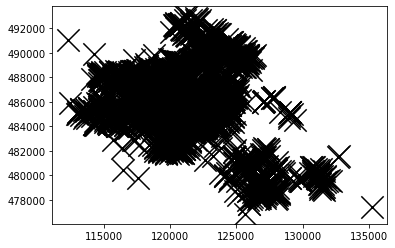

In [14]:
df_kh = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Verhardingen\kunststof_halfverh_boom.csv")
df_ab = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Verhardingen\asfalt_beton_boom.csv")
df_tot = pd.concat([df_kh, df_ab], axis=0)

weg_x = []
weg_y = []
for index, row in df_tot.iterrows():
    rd_x = row['X']
    rd_y = row['Y']
    weg_x.append(rd_x)
    weg_y.append(rd_y)
plt.scatter(weg_x, weg_y, c='Black', marker='x', s=500) 


## Meldingen weginspecteurs

In [15]:
df_kh = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Verhardingen\kunststof_halfverh_boom.csv")
df_ab = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Verhardingen\asfalt_beton_boom.csv")
df_tot = pd.concat([df_kh, df_ab], axis=0)

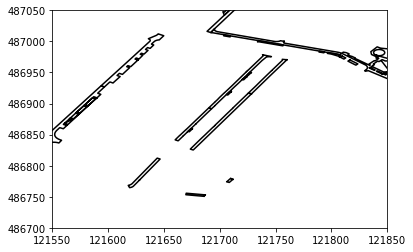

In [16]:
sf = shp.Reader(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Verhardingen\Planning2021_v2_boomwortelopdruk.dbf")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]] 
    try:
        weight = shape.record['CROW_ONEFF'][0]
    except:
        continue
    if weight == 'E':
        color='Black'
    elif weight == 'M':
        color='Blue'
    elif weight == 'L':
        color='Purple'
    else:
        continue
    plt.plot(x, y, zorder=-1, color=color)
plt.xlim(121550, 121850)
plt.ylim(486700, 487050)
plt.show()


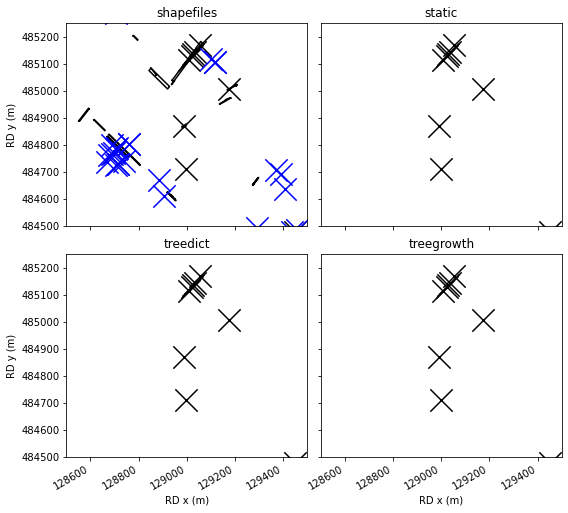

In [17]:
sf = shp.Reader(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\Verhardingen\Planning2021_v2_boomwortelopdruk.dbf")


fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,8))
axs[1, 0].scatter(x_list_treedict, y_list_treedict, c=color_list_treedict)
axs[1, 0].set_title('treedict')
axs[1, 0].set_ylabel('RD y (m)')
axs[1, 0].set_xlabel('RD x (m)')

axs[0, 1].scatter(x_list_static, y_list_static, c=color_list_static)
axs[0, 1].set_title('static')

axs[1, 1].scatter(x_list_treegrowth, y_list_treegrowth, c=color_list_treegrowth)
axs[1, 1].set_title('treegrowth')
axs[1, 1].set_xlabel('RD x (m)')

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]] 
    try:
        weight = shape.record['CROW_ONEFF'][0]
    except:
        continue
    if weight == 'E':
        color='Black'
    elif weight == 'M':
        color='Blue'
    elif weight == 'L':
        color='Purple'
    else:
        continue
#     axs[1, 1].plot(x, y, zorder=-1, color=color)
    axs[0, 0].plot(x, y, zorder=-1, color=color)
#     axs[0, 1].plot(x, y, zorder=-1, color=color)
#     axs[1, 0].plot(x, y, zorder=-1, color=color)
# plt.xlim(121550, 121850)
# plt.ylim(486700, 487050)
plt.xlim(128500, 129500)
plt.ylim(484500, 485250)
axs[0, 0].set_title('shapefiles')
axs[0, 0].set_ylabel('RD y (m)')
axs[0, 0].scatter(weg_x, weg_y, c='Black', marker='x', s=500) 
axs[0, 0].scatter(sia_x, sia_y, c='Blue', marker='x', s=500) 
axs[1, 1].scatter(weg_x, weg_y, c='Black', marker='x', s=500) 
axs[0, 1].scatter(weg_x, weg_y, c='Black', marker='x', s=500) 
axs[1, 0].scatter(weg_x, weg_y, c='Black', marker='x', s=500) 
plt.tight_layout()
fig.autofmt_xdate()
plt.show()

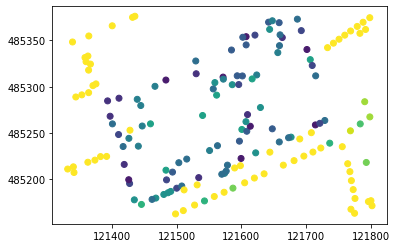

In [18]:
plt.scatter(x_list_static, y_list_static, c=color_list_static)

In [ ]:
# def plotfunc(df_static, df_treedict, df_treegrowth, sia_x, sia_y, xlim, ylim):
#     fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,8))
    
#     df_treedict.plot(kind='scatter', x='rdx', y='rdy', c='count', colormap='viridis', ax=axs[1,0])
#     axs[1,0].set_title('treedict')
#     axs[1,0].set_ylabel('RD y (m)')
#     axs[1,0].set_xlabel('RD x (m)')
    
#     df_static.plot(kind='scatter', x='rdx', y='rdy', c='count', colormap='viridis', ax=axs[0,1])
#     axs[0,1].set_title('static')

#     df_treegrowth.plot(kind='scatter', x='rdx', y='rdy', c='count', colormap='viridis', ax=axs[1,1])
#     axs[1,1].set_title('treegrowth')
#     axs[1,1].set_xlabel('RD x (m)')

#     for shape in wegen_shapes.shapeRecords():
#         x = [i[0] for i in shape.shape.points[:]]
#         y = [i[1] for i in shape.shape.points[:]] 
#         try:
#             weight = shape.record['CROW_ONEFF'][0]
#         except:
#             continue
#         if weight == 'E':
#             color='Black'
#         elif weight == 'M':
#             color='Blue'
#         elif weight == 'L':
#             color='Purple'
#         else:
#             continue
# #         axs[0, 0].plot(x, y, zorder=-1, color=color)

# #     axs[0, 0].set_title('shapefiles')
# #     axs[0, 0].set_ylabel('RD y (m)')
# #     axs[0, 0].scatter(weg_x, weg_y, c='Black', marker='x', s=500) 
# #     axs[0, 0].scatter(sia_x, sia_y, c='Blue', marker='x', s=500) 
    
#     plt.xlim(xlim[0], xlim[1])
#     plt.ylim(ylim[0], ylim[1])
#     plt.tight_layout()
#     fig.autofmt_xdate()
#     plt.show()